<a href="https://colab.research.google.com/github/Murari37/CNN_Classification/blob/main/animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
x_train = np.genfromtxt('input.csv', delimiter = ',', invalid_raise=False)
y_train = np.loadtxt('labels.csv',delimiter = ',')
x_test = np.genfromtxt('input_test.csv', delimiter = ',', invalid_raise=False)
y_test = np.loadtxt('labels_test.csv',delimiter = ',')

/tmp/ipython-input-4217579056.py:1: ConversionWarning: Some errors were detected !
    Line #1338 (got 29436 columns instead of 30000)
  x_train = np.genfromtxt('input.csv', delimiter = ',', invalid_raise=False)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

#data augmention to improve training
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2
)

In [6]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (1337, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


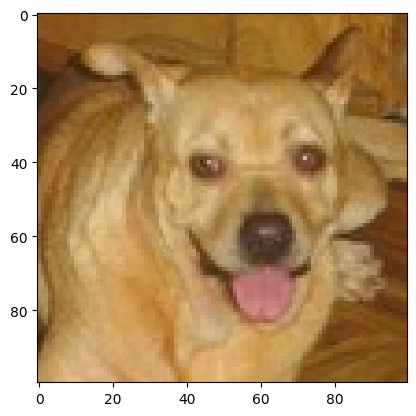

In [7]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model = Sequential()

model.add(Conv2D(32, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(datagen.flow(x_train, y_train[:len(x_train)], batch_size = 32),
          epochs = 5,
          validation_data = (x_test, y_test),
          verbose = 1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 653ms/step - accuracy: 0.6797 - loss: 0.6580 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 38s 582ms/step - accuracy: 0.7483 - loss: 0.5731 - val_accuracy: 0.5000 - val_loss: 0.6988
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 27s 648ms/step - accuracy: 0.7498 - loss: 0.5643 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 25s 591ms/step - accuracy: 0.7449 - loss: 0.5801 - val_accuracy: 0.5000 - val_loss: 0.7092
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 588ms/step - accuracy: 0.7374 - loss: 0.5672 - val_accuracy: 0.5000 - val_loss: 0.7424


In [12]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.7916 - loss: 0.5115


[0.7424176931381226, 0.5]

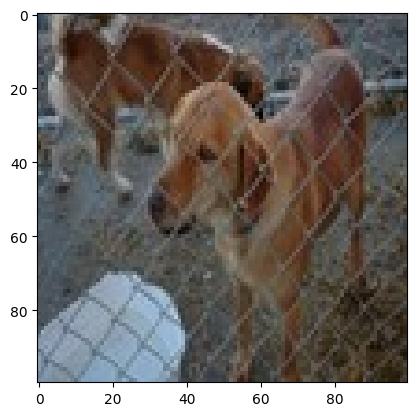

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Our model says it is a:  dog


In [13]:
indx2 = random.randint(0,len(y_test))
plt.imshow(x_test[indx2, :])
plt.show()

y_pred = model.predict(x_test[indx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a: ", pred)

In [14]:
    model.save('model.h5')
    print("saved model to disk")

saved model to disk
